In [43]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
dati = pd.read_csv("dati/online_retail.csv")

In [2]:
dati

,InvoiceNo,StockCode,Description
0,562583,35637A,IVORY STRING CURTAIN WITH POLE
1,562583,35638A,PINK AND BLACK STRING CURTAIN
2,562583,84927F,PSYCHEDELIC TILE HOOK
3,562583,22425,ENAMEL COLANDER CREAM
4,562583,16008,SMALL FOLDING SCISSOR(POINTED EDGE)
...,...,...,...
227755,C581229,23158,SET OF 5 LUCKY CAT MAGNETS
227756,C581229,22712,CARD DOLLY GIRL
227757,C581229,22027,TEA PARTY BIRTHDAY CARD
227758,C581229,21508,VINTAGE KID DOLLY CARD


In [5]:
len(dati["InvoiceNo"].unique())

9709

In [6]:
len(dati["Description"].unique())

3461

In [7]:
agg_data = dati.groupby("InvoiceNo")

In [8]:
transactions = []
for i, frame in agg_data: 
    li = []
    for k, row in frame.iterrows(): 
        di = str(row["Description"])
        li.append(di)
    transactions.append(li)    

In [9]:
transactions[:2]

[['DOORMAT RED RETROSPOT',
  'DOORMAT WELCOME SUNRISE',
  'DOORMAT MULTICOLOUR STRIPE',
  'PACK OF 72 SKULL CAKE CASES',
  'PACK OF 60 PINK PAISLEY CAKE CASES',
  'PACK OF 60 MUSHROOM CAKE CASES',
  'PACK OF 72 RETROSPOT CAKE CASES',
  '72 SWEETHEART FAIRY CAKE CASES',
  '60 TEATIME FAIRY CAKE CASES',
  'SET OF 36 PAISLEY FLOWER DOILIES',
  'SET OF 36 MUSHROOM PAPER DOILIES',
  'SET OF 72 SKULL PAPER  DOILIES',
  'SET/10 BLUE POLKADOT PARTY CANDLES',
  'SET/10 PINK POLKADOT PARTY CANDLES',
  'SET/10 IVORY POLKADOT PARTY CANDLES',
  'SET/10 RED POLKADOT PARTY CANDLES'],
 ['SET OF 6 SPICE TINS PANTRY DESIGN',
  'PANTRY WASHING UP BRUSH',
  'SET OF 36 TEATIME PAPER DOILIES',
  'SET OF 3 CAKE TINS PANTRY DESIGN ',
  'SET OF 4 PANTRY JELLY MOULDS',
  'TEA TIME DES TEA COSY',
  'SET 2 PANTRY DESIGN TEA TOWELS',
  ' SET 2 TEA TOWELS I LOVE LONDON ',
  'PARTY CONES CANDY ASSORTED',
  'PINK HAPPY BIRTHDAY BUNTING',
  '3 TRADITIONAl BISCUIT CUTTERS  SET',
  'PAPER BUNTING COLOURED LACE',
  'COTT

#### Preparo l'encoding 

In [10]:
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder().fit(transactions)

In [11]:
onehot = encoder.transform(transactions)

In [12]:
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [13]:
onehot

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,wet boxes,wet pallet,wet rusty,wet?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9705,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9706,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9707,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
frequent_itemset = apriori(onehot, min_support=0.02, max_len = 4, use_colnames = True)

In [26]:
frequent_itemset.head()

,support,itemsets
0,0.020805,(12 PENCIL SMALL TUBE WOODLAND)
1,0.021629,(15CM CHRISTMAS GLASS BALL 20 LIGHTS)
2,0.020187,(3 DRAWER ANTIQUE WHITE WOOD CABINET)
3,0.022247,(3 HEARTS HANGING DECORATION RUSTIC)
4,0.023689,(3 STRIPEY MICE FELTCRAFT)


In [27]:
type(frequent_itemset)

pandas.core.frame.DataFrame

In [28]:
for i, k in frequent_itemset.iterrows(): 
    print(k["itemsets"])

frozenset({'12 PENCIL SMALL TUBE WOODLAND'})
frozenset({'15CM CHRISTMAS GLASS BALL 20 LIGHTS'})
frozenset({'3 DRAWER ANTIQUE WHITE WOOD CABINET'})
frozenset({'3 HEARTS HANGING DECORATION RUSTIC'})
frozenset({'3 STRIPEY MICE FELTCRAFT'})
frozenset({'4 TRADITIONAL SPINNING TOPS'})
frozenset({"6 GIFT TAGS 50'S CHRISTMAS "})
frozenset({'6 GIFT TAGS VINTAGE CHRISTMAS '})
frozenset({'6 RIBBONS RUSTIC CHARM'})
frozenset({'60 CAKE CASES VINTAGE CHRISTMAS'})
frozenset({'60 TEATIME FAIRY CAKE CASES'})
frozenset({'72 SWEETHEART FAIRY CAKE CASES'})
frozenset({'ALARM CLOCK BAKELIKE CHOCOLATE'})
frozenset({'ALARM CLOCK BAKELIKE GREEN'})
frozenset({'ALARM CLOCK BAKELIKE IVORY'})
frozenset({'ALARM CLOCK BAKELIKE PINK'})
frozenset({'ALARM CLOCK BAKELIKE RED '})
frozenset({'ANTIQUE SILVER T-LIGHT GLASS'})
frozenset({'ASSORTED COLOUR BIRD ORNAMENT'})
frozenset({'BAKING SET 9 PIECE RETROSPOT '})
frozenset({'BAKING SET SPACEBOY DESIGN'})
frozenset({'BATHROOM METAL SIGN'})
frozenset({'BELLE JARDINIERE CUSHI

In [32]:
rules = association_rules(frequent_itemset, metric = "support", 
                          min_threshold=0.005)

In [39]:
sorted_rules = rules.sort_values(["lift"], ascending = False)

In [41]:
important_rules = sorted_rules[:10]

In [44]:
important_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
138,(SET OF 3 WOODEN TREE DECORATIONS),(SET OF 3 WOODEN STOCKING DECORATION),0.026779,0.028736,0.020496,0.765385,26.634836,0.019727,4.139813
139,(SET OF 3 WOODEN STOCKING DECORATION),(SET OF 3 WOODEN TREE DECORATIONS),0.028736,0.026779,0.020496,0.713262,26.634836,0.019727,3.394107
23,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.032650,0.029354,0.023277,0.712934,24.287277,0.022319,3.381261
22,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029354,0.032650,0.023277,0.792982,24.287277,0.022319,4.672792
24,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.032650,0.035946,0.024925,0.763407,21.237587,0.023752,4.074735
25,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.035946,0.032650,0.024925,0.693410,21.237587,0.023752,3.155188
131,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.035946,0.029354,0.022247,0.618911,21.084241,0.021192,2.547033
130,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029354,0.035946,0.022247,0.757895,21.084241,0.021192,3.981962
150,"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HE...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.022350,0.045628,0.021011,0.940092,20.603510,0.019992,15.930675
151,(WOODEN STAR CHRISTMAS SCANDINAVIAN),"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HE...",0.045628,0.022350,0.021011,0.460497,20.603510,0.019992,1.812129


In [49]:
pim = important_rules.pivot(index = "consequents", columns = "antecedents", values = "lift" )

In [50]:
pim

antecedents,(SET OF 3 WOODEN TREE DECORATIONS),(SET OF 3 WOODEN STOCKING DECORATION),(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HEART CHRISTMAS SCANDINAVIAN)",(WOODEN STAR CHRISTMAS SCANDINAVIAN)
consequents,,,,,,,
(SET OF 3 WOODEN STOCKING DECORATION),26.634836,NaN,NaN,NaN,NaN,NaN,NaN
(SET OF 3 WOODEN TREE DECORATIONS),NaN,26.634836,NaN,NaN,NaN,NaN,NaN
(PINK REGENCY TEACUP AND SAUCER),NaN,NaN,24.287277,NaN,21.084241,NaN,NaN
(GREEN REGENCY TEACUP AND SAUCER),NaN,NaN,NaN,24.287277,21.237587,NaN,NaN
(ROSES REGENCY TEACUP AND SAUCER ),NaN,NaN,21.237587,21.084241,NaN,NaN,NaN
(WOODEN STAR CHRISTMAS SCANDINAVIAN),NaN,NaN,NaN,NaN,NaN,20.60351,NaN
"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HEART CHRISTMAS SCANDINAVIAN)",NaN,NaN,NaN,NaN,NaN,NaN,20.60351


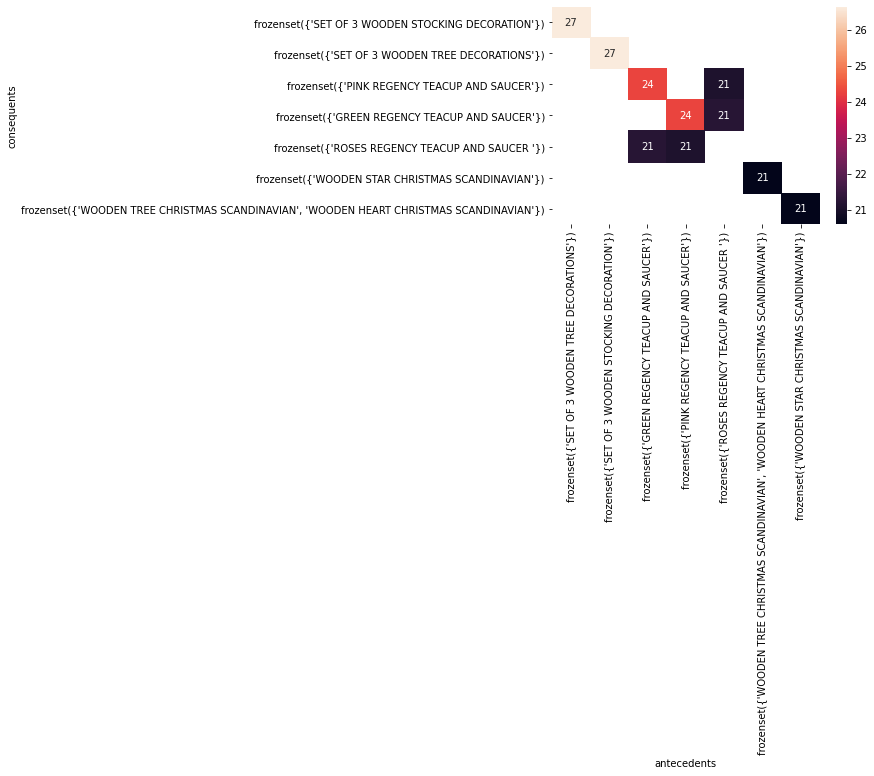

In [51]:
sb.heatmap(pim, annot = True)
plt.show()